In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_input = '2016_Listings.csv'
listings = pd.read_csv(file_input)
listings['zipcode'] = pd.to_numeric(listings['zipcode'])
by_zipcode = listings.groupby('zipcode').count()
by_zipcode = by_zipcode.sort_values('id', ascending=False)
by_zipcode.head(10)
#221 rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_month
zipcode,,,,,,,,,,,,,,,,,
11211,20241,20241,20241,18898,20241,20241,20241,20241,20241,20241,20241,20241,16109,16106,20241,20241,20241
10002,13784,13784,13784,13254,13784,13784,13784,13784,13784,13784,13784,13784,11369,11369,13784,13784,13784
11206,13536,13536,13536,12714,13536,13536,13536,13536,13536,13536,13536,13536,10467,10467,13536,13536,13536
10009,13079,13079,13079,12721,13079,13079,13079,13079,13079,13079,13079,13079,10427,10424,13079,13079,13079
11221,12465,12461,12465,11959,12465,12465,12465,12465,12465,12465,12465,12465,9627,9626,12465,12465,12465
10003,11980,11980,11980,11361,11980,11980,11980,11980,11980,11980,11980,11980,9568,9567,11980,11980,11980
11238,11883,11883,11883,11387,11883,11883,11883,11883,11883,11883,11883,11883,9349,9349,11883,11883,11883
11216,10834,10834,10834,10323,10834,10834,10834,10834,10834,10834,10834,10834,8436,8436,10834,10834,10834
11222,9601,9601,9601,9305,9601,9601,9601,9601,9601,9601,9601,9601,7181,7180,9601,9601,9601


In [70]:
zipcodes = [11211,10002,11206,10009,11221,10003,11238,11216,11222,10025]
means = []
medians = []
maxs = []
mins = []

for zipcode in zipcodes:
    median = listings.loc[listings['zipcode']==zipcode]['price'].median()
    mean = listings.loc[listings['zipcode']==zipcode]['price'].mean()
    maxe = listings.loc[listings['zipcode']==zipcode]['price'].max()
    mine = listings.loc[listings['zipcode']==zipcode]['price'].min()
    means.append(mean)
    medians.append(median)
    maxs.append(maxe)
    mins.append(mine)

zipcode_prices = pd.DataFrame({
    'Zip Code':zipcodes,
    'Mean': means,
    'Median': medians, 
    'Max': maxs, 
    'Min': mins
})
zipcode_prices

,Zip Code,Mean,Median,Max,Min
0,11211,143.768193,119.0,7000,25
1,10002,168.815366,135.0,9999,23
2,11206,94.994238,75.0,9000,10
3,10009,165.071030,135.0,5200,23
4,11221,89.587325,70.0,2000,10
5,10003,218.895993,169.0,6000,10
6,11238,138.259867,106.0,6500,10
7,11216,110.022522,85.0,2000,10
8,11222,128.623164,109.0,1600,25
9,10025,158.431274,119.0,9998,10


In [72]:
# Create Data Frame with specified zipcodes
# data from all months (except march-missing) per top 10 zipcodes(based on most concetration of listings)
zipcodes = [11211,11221,11206,10019,11216,10002,10009,10003,11222,11238]
frames = []

for zipcode in zipcodes:
    one_zip = listings.loc[listings['zipcode']==zipcode]
    frames.append(one_zip)

#print(frames)
by_zip = pd.concat(frames)
by_zip.reset_index()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_month
0,16,5258,Artist's Loft with indoor Hammock!,7611,NaN,Brooklyn,Williamsburg,11211,40.710302,-73.964961,Entire home/apt,175,2,51,8/28/2015,0.63,1,308,201601
1,24,5857,"Amazing Apt in WILLIAMSBURG, NY!!",10176,Juan,Brooklyn,Williamsburg,11211,40.717358,-73.942063,Entire home/apt,250,2,66,12/7/2015,0.81,1,351,201601
2,28,6111,"Dream Come True! Williamsburg, BK",12169,Miko & Lauren,Brooklyn,Greenpoint,11211,40.719211,-73.951231,Private room,109,2,96,10/26/2015,1.19,2,363,201601
3,34,7064,"Bright, peaceful loft, Williamsburg",17297,Joelle,Brooklyn,Williamsburg,11211,40.712643,-73.958624,Private room,125,2,9,8/31/2015,0.14,1,365,201601
4,84,13002,CBG Williamsburg loft room,22486,Lisel,Brooklyn,Williamsburg,11211,40.710961,-73.946840,Entire home/apt,145,2,10,12/12/2015,0.15,5,365,201601
5,87,13362,Landmark Williamsburg,52043,NaN,Brooklyn,Williamsburg,11211,40.715022,-73.958098,Entire home/apt,190,2,56,10/7/2015,0.76,1,359,201601
6,88,13380,"1 br Williamsburg Brooklyn Condo,",52233,NaN,Brooklyn,Williamsburg,11211,40.712523,-73.958105,Entire home/apt,100,7,4,6/7/2015,0.15,1,118,201601
7,101,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,11211,40.708808,-73.959302,Entire home/apt,150,2,60,12/27/2015,0.82,1,36,201601
8,131,16008,Apt in Williamsburg,62132,Rachel,Brooklyn,Williamsburg,11211,40.714282,-73.945124,Entire home/apt,125,2,30,11/29/2015,0.41,1,341,201601
9,166,18764,Cozy 2 BR in Williamsburg,72014,NaN,Brooklyn,Williamsburg,11211,40.711540,-73.961120,Private room,129,3,54,12/16/2015,0.77,2,351,201601


In [80]:
#Avg price per month of 2016 for top 10 zipcodes (based on most concetration of listings)

by_month = by_zip.groupby('year_month')['price'].mean()
print(by_month)

by_m_max = by_zip.groupby('year_month')['price'].max()
print(by_m_max)

by_m_min = by_zip.groupby('year_month')['price'].min()
print(by_m_min)

year_month
201601    147.207304
201602    145.121072
201604    146.060921
201605    147.868601
201606    147.559228
201607    145.153404
201608    145.032514
201609    145.325450
201610    146.669895
201611    146.869331
201612    144.462298
Name: price, dtype: float64
year_month
201601    6500
201602    6500
201604    6500
201605    6500
201606    7000
201607    6500
201608    6500
201609    9000
201610    9999
201611    9999
201612    9999
Name: price, dtype: int64
year_month
201601    10
201602    15
201604    20
201605    15
201606    10
201607    10
201608    10
201609    10
201610    10
201611    10
201612    14
Name: price, dtype: int64


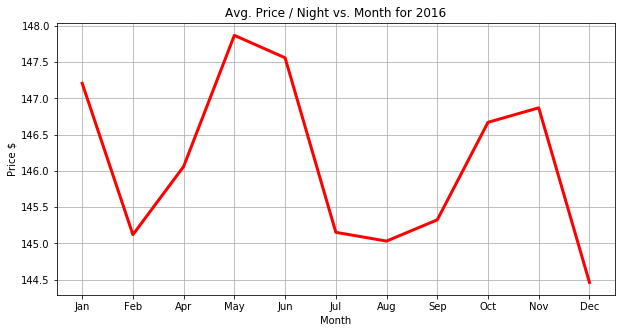

In [95]:
# Plot averages
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.plot(x_axis, by_month, color='r', linewidth=3)
#plt.scatter(x_axis, by_m_min, color='b', linewidth=3)
#plt.scatter(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price $')
plt.title('Avg. Price / Night vs. Month for 2016')
plt.show()

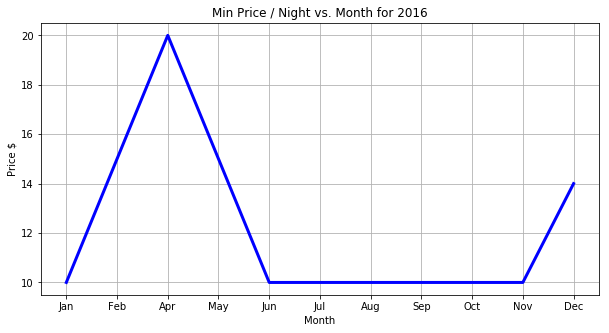

In [97]:
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.scatter(x_axis, by_month, color='r', linewidth=3)
plt.plot(x_axis, by_m_min, color='b', linewidth=3)
#plt.scatter(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price $')
plt.title('Min Price / Night vs. Month for 2016')
plt.show()

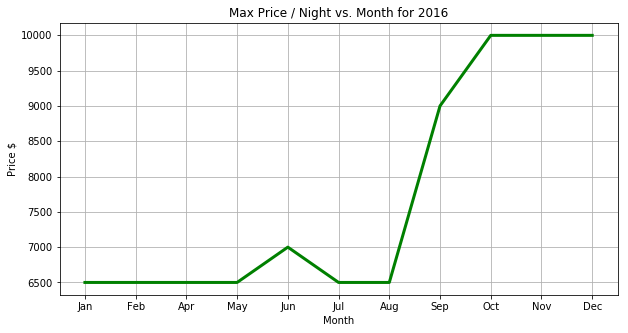

In [96]:
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.scatter(x_axis, by_month, color='r', linewidth=3)
#plt.scatter(x_axis, by_m_min, color='b', linewidth=3)
plt.plot(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price $')
plt.title('Max Price / Night vs. Month for 2016')
plt.show()

In [135]:
#find number of listings per month - top zipcodes only
listing_bymonth = by_zip.groupby('year_month')['id'].count()
#print(listing_bymonth)

grouped = pd.DataFrame({"Number of Listings":listing_bymonth, "Avg Price":by_month})
print(grouped)

#original data - all zipcodes
#listing_bymonth_original = listings.groupby('year_month')['id'].count()
#print(listing_bymonth_original)

            Number of Listings   Avg Price
year_month                                
201601                   11582  147.207304
201602                   11489  145.121072
201604                   10210  146.060921
201605                    9924  147.868601
201606                   11498  147.559228
201607                   12014  145.153404
201608                   10949  145.032514
201609                   12346  145.325450
201610                   12287  146.669895
201611                   12061  146.869331
201612                   12559  144.462298


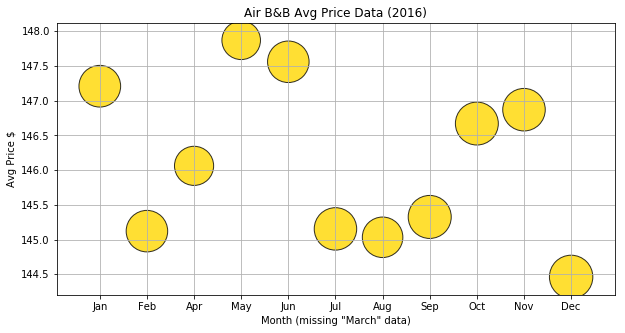

In [139]:
#BUBBLE PLOT - S==Correlating to number of listings/month 2016


plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.scatter(x_axis, grouped["Avg Price"], s=grouped["Number of Listings"]*.15, alpha=.8, linewidths=1.0, edgecolors='black',
            color='gold', label ="Listing Concentrations")
#plt.scatter(x_axis, by_m_min, color='b', linewidth=3)
#plt.plot(x_axis, by_m_max, color='g', linewidth=3)
plt.grid()
plt.xlabel('Month (missing "March" data)')
plt.ylabel('Avg Price $')
plt.title('Air B&B Avg Price Data (2016)')
plt.show()